# Project Description

### Dataset: https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata
RESIDENTIAL ENERGY CONSUMPTION SURVEY (RECS): The Residential Energy Consumption Survey is a national sample survey that collects energy-related data for housing units occupied as a primary residence and the households that live in them.

Number of Columns: 940 <br>
Number of Rows: 12083

### Goal:
Build a Machine Learning model that predicts the electric consumption of a household located in the KWH field.

#### Approach: <b>Scroll to the bottom for an elaborate explanation for each step </b>
1. Select Features using correlation.
2. Detect Outliers of numerical columns and replace outlier values within a range that represents the outliers.
3. One Hot Encode purely categorical columns, Label Encode ordinal categorical columns, Scale dataset using MinMaxScaler.
4. Analyze Skewness of columns and fix by square root or square.
5. Create a list of dataset to experiment with ML models: AdaBoostRegressor, SVR, RandomForestRegressor, LinearRegressor, etc
6. Test-train split datasets to fit models with best hyperparameter and look at prediction score: r2, mae, rmse
7. (Optional) Grid search hyperparameters tuning for model 

### Result:
Best ML Regressor:  <br>
SVR(C=10, coef0=1, degree=3 gamma='auto', kernel='poly') <br>
RMSE:  0.7555135894126059 <br>
MAE:  0.5562131155648198 <br>
R2/Score:  0.7820742623092414 <br>


# Solution
To be able to create feed the data to a machine learning regressor, I have transformed it in ways that make sense and created a set of datasets to be used for training. Then I used regressors like SVR, AdaBoostRegressor and LinearRegressor from the Sklearn library with sensible parameters to achieve a r2 score of 0.78 with MAE of 0.55 to predict the KWH value of a household.
# Data Preprocessing

## Feature Selection

### Step 0: Imputation columns and id column is dropped. EDA on remaining dataset using Pandas Profiling.
First the data is read, imputation columns and id column is dropped. Making use of the Pandas Profiling library, a quick exploratory analysis was done. There were 581 columns to select features froms. There were categorical, ordinal categorical and numerical columns. Looking at the histograms, most of the variables including nurmerical and ordinal categorical columns were skewed.

### Step 1: Removing any column that would give away the KWH value
From the 581 columns only 49 columns were selected. The feature selection was done by first removing any column that would give away the KWH value making our model not as useful as it might seem. A list of columns (EL_cols) were seleted to be removed; from that list the only one column, TOTALDOL (Total cost per year, corr with KWH: 0.62), was selected that does not give away the KWH value but is a key predictor. Initially this TOTALDOL column was not selected and a model was trained to achieve a r2 score of 0.63. The only way I found the score to go up was to add the TOTALDOL column, resulting a model with a r2 score of 0.78. This implied that adding only relevant columns will increase the accuracy of the model. If more columns from EL_cols were added the accuracy will most likely increase, however adding more columns would mean that the model would be able to calculate the KWH value instead of predicting it.

### Step 2: 
The second step of feature selection involves calculating the correlation of each column to every other column using df.corr().stack(). Analysing the correlations of each column to KWH, only the columns that have correlation in the range [0.3, 1] were kept resulting in a dataset of 77 columns.

### Step 3:
The final step of feature selection is removing redundant columns. From the 77 columns there were columns that represented the same information, ie - they were highly correlated among themselves > 0.9. Again by finding the correlation between all 77 columns and filtering the ones that have correlation greater than 0.9, columns representing the same information were grouped and the columns that had the highest correlation to KWH was kept and the other columns in that group were dropped. This resulted in a 49 column dataset having the most informative columns to predict KWH without any redundant or cheat columns.

### Columns Analysis
The 49 columns were categorized by the datatype they were holding: pure_numerical, pure_categorical, ordinal_categorical.

## Outlier Detection and Fix

### Ouliers for Numerical columns
The number of outliers for each numerical column was calculated by using box plots and IQR. The columns that had more than 1% number of outliers were fixed. Since there were a lot of outliers, it made sense not take out or replace all outlier values as they could be a key indicator of electricity consumption. Instead, a threshold value for each outliered column was selected such that there are around 50 data points above the threshold value. Outlier values above the thresholds were replaced by a random numbers that represents the acceptable outlier range for a numerical column.

### Ouliers for Ordinal Categorical columns
Since the data in the categorical columns (ordinal/pure) are integers only between a fixed range and it is not possible for categorical columns to have any other value, it is safe to say that these columns do not have outliers. In case you might be looking at the histogram or value_counts of a categorical column and wondering that the data is very skewed, or most people has selected only one of the categories, for example -2 (N/A). This doesn't mean that these numbers are outliers, it's just that most people has conciously made the decision to select that one famous category.

## OHE, Label Encoding, MinMaxScaling
Now that the outliers are fixed, it is time to create some datasets starting with -> data.
### One Hot Encoding the columns that are purely categorical
data -> data_OHE
### Label Encoding the columns that are ordinal categorical
data_OHE -> data_OHE_LE
### MinMaxScaling the data as some columns are in thousand and some in tens
data_OHE_LE -> data_OHE_LE_MMS
#### Some other datasets were also created for experimentation
data -> Label Encoding the columns that are ordinal categorical + purely categorical -> data_LE <br>
data_LE -> MinMaxScaling -> data_LE_MMS


## Skewness Fix
Skewness of given columns were analyzed and the columns which had an absolute skewness of 0.4 or greater were selected to be fixed. If a column had a positive skew, it was fixed by square rooting the column and if the skew was negative, the column was fixed by squaring the column. In the case that the square root or square transformation resulted in a larger absolute skewness, the original skewness was kept by doing no transformation to that column. 

### Skewness fix of numerical and ordinal categorical columns
data_OHE_LE_MMS -> Skewness fix of numerical and ordinal categorical columns -> data_OHE_LE_MMS_Sk

### Skewness fix of only the numerical columns in the hope that the skewness of categorical columns would be helpful in predicting KWH
data_OHE_LE_MMS -> Skewness fix of numerical columns only -> data_OHE_LE_MMS_SkNum

#### Further lowering the skewness of columns by applying skewness fix for 2nd...3rd time
data_OHE_LE_MMS_Sk -> Skewness fix -> data_OHE_LE_MMS_Sk_Sk -> Skewness fix -> data_OHE_LE_MMS_Sk_Sk_Sk
<br>
data_OHE_LE_MMS_SkNum -> Skewness fix -> data_OHE_LE_MMS_SkNum_SkNum -> Skewness fix -> data_OHE_LE_MMS_SkNum_SkNum_SkNum
#### Skewness fix of other datasets for experimentation
data_LE_MMS -> data_LE_MMS_Sk -> data_LE_MMS_Sk_Sk -> data_LE_MMS_Sk_Sk_Sk
<br>
data_LE_MMS -> data_LE_MMS_SkNum -> data_LE_MMS_SkNum_SkNum -> data_LE_MMS_SkNum_SkNum_SkNum


# Datasets used for training/experimenting
1. data
2. data_OHE 
3. data_OHE_LE <-- LE of numerical and ordinal categorical columns
4. data_OHE_LE_MMS <-- MMS not applied to KWH
5. data_OHE_LE_MMS_Sk <-- sqrt applied to KWH 1st time
6. data_OHE_LE_MMS_Sk_Sk <-- sqrt applied to KWH and appropriate columns 2nd time
7. data_OHE_LE_MMS_Sk_Sk_Sk <-- sqrt applied to KWH and appropriate columns 3rd time
8. data_OHE_LE_MMS_SkNum
9. data_OHE_LE_MMS_SkNum_SkNum
10. data_OHE_LE_MMS_SkNum_SkNum_SkNum

                           
11. data_LE <-- LE of numerical, ordinal categorical, pure categorical columns
12. data_LE_MMS <-- MMS not applied to KWH
13. data_LE_MMS_Sk <-- sqrt applied to KWH 1st time
14. data_LE_MMS_Sk_Sk <-- sqrt applied to KWH and appropriate columns 2nd time
15. data_LE_MMS_Sk_Sk_Sk <-- sqrt applied to KWH and appropriate columns 3rd time
16. data_LE_MMS_SkNum
17. data_LE_MMS_SkNum_SkNum
18. data_LE_MMS_SkNum_SkNum_SkNum


# Grid Search Hyperparameter tuning
This section is for Grid Search Hyperparameter tuning for several models, however this section is not used for this project. Making use of GridSearchCV from Sklearn, models are trained using n-fold cross validation on a range of different parameter. The result of the parameter tuning is saved and analyzed and for choosing the best hyperparameters. A model is refitted on the data using the best parameters and saved in a pickle file.

# Test-Train Split and Data Fitting
From the 18 datasets created above, a dataset, a model and a set of parameters for the model is used to train the model on training data. Predictions are made on an unseen portion of the selected dataset (test data) to compare with the actual values. Metrics like R2-score, RMSE, MAE are used to get a sense of how good a model is

## Models used
1. RandomForestRegressor
2. AdaBoostRegressor
3. GradientBoostingRegressor
4. LinearRegression
5. SVR
6. KNeighborsRegressor
7. Ridge
8. RidgeCV
9. HuberRegressor
10. BayesianRidge

## Best Dataset, Model and Score
Dataset: data_OHE_LE_MMS_Sk_Sk_Sk <br>
SVR(C=10, coef0=1, gamma='auto', kernel='poly') <br>
rmse:  0.7519038495825802 <br>
mae:  0.5542237374613589 <br>
r2/score:  0.7833971697461442 <br>
adjusted_r2:  0.7825151337881587 <br>
MAE_KWH:  2277.14 <br>

## Best Dataset, Model and Score without TOTALDOL
Dataset: data_OHE_LE_MMS_Sk_Sk_Sk <br>
SVR(C=10, coef0=1, gamma='auto', kernel='poly') <br>
rmse:  0.9721654020751503 <br>
mae:  0.7217882501119208 <br>
r2/score:  0.637907247163071 <br>
adjusted_r2:  0.636432756604689 <br>
MAE_KWH:  3027.64 <br>

# Conclusion

## Remarks about using TOTALDOL
Initially I did not use the TOTALDOL column to predict KWH as it seems like giving away too much to the model. This way got me an r2 score of 0.63 using the best dataset. Whatever I did did not seem to budge the score. Then I analysed all the column that I had removed and found that TOTALDOL (Total Cost) is the only acceptable column that does not directly relate to KWH like the other columns (TOTALDOLRFG, TOTALDOLSPH, TOTALBTUCOL) did. After taking TOTALDOL column in the dataset, the r2 score jumped to 0.78 resulting in a 15% increase.

## Things to try
1. Decrease threshold for minimum correlation to KWH to add more columns to see if score increases
2. Combining some feature and experimenting
3. Making Pipelines for models

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from dataprep.eda import create_report
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, BayesianRidge, HuberRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# EDA - Pandas Profiling

drop imputation columns and unique id before Pandas Profiling

In [2]:
data = pd.read_csv("./recs2009_public.csv", low_memory=False)
imputation_columns = [c for c in data.columns if c.startswith("Z")]
data.drop(columns=imputation_columns,inplace=True)
data.drop(columns=['DOEID'], inplace=True)

In [3]:
profile = ProfileReport(data, title="RECS Profile",minimal=True)
# profile.to_notebook_iframe()
profile.to_file("./EDA/pandas_profiling_recs_report_initial.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### First look at Pandas Profiling tells the following:
1. 581 columns: need to do feature selection
2. 3 types of data: categorical, ordinal categorical, numerical
3. lot of columns are skewed

# Feature Selection
#### Idea:
Remove all columns directly linked or correlated to KWH, for example: KWH%, BTUEL%, DOLEL%, etc. <br> 
First choose all columns (set1) that have a correlation, corr, to KWH such that 0.3 <= corr <= 1. <br>
Among the first set of columns (set1), groups of columns represent the same information, ie: they are highly correlated. Keep the best column from each group. <br>


### Analysis of directly correlated columns (KWH, BTU, DOL) to electricity consumption

Assuming: directly_related_cols = [c for c in data.columns if (("KWH" in c and len(c)>3) or ("BTU" in c) or ("DOL" in c) )]


In [4]:
c = data.corr('spearman').stack().reset_index().drop_duplicates()
c.columns = ['Target', 'Variables', 'Correlation']
c['abs(Correlation)'] = abs(c['Correlation'])
KWH_Cols_Corr = c[( (c['abs(Correlation)'] >= 0.0) & (c['abs(Correlation)'] <= 1) & (c['Target']=='KWH') )]
KWH_Cols_Corr.sort_values('abs(Correlation)').to_csv('./CSVs/KWH_Cols_Corr.csv',index=False)

directly_related_cols = [c for c in data.columns if (("KWH" in c and len(c)>3) or ("BTU" in c) or ("DOL" in c) )]
print(directly_related_cols)

KWH_Cols_Corr_sorted = KWH_Cols_Corr[KWH_Cols_Corr['Variables'].isin(directly_related_cols)].sort_values('abs(Correlation)', ascending=False)
KWH_Cols_Corr_sorted.to_csv('./CSVs/KWH_Cols_Corr_sorted.csv', index=False)
print(len(KWH_Cols_Corr_sorted['Variables']))
KWH_Cols_Corr_sorted

# looking at the correlations of directly_related_cols to KHW

['KWHSPH', 'KWHCOL', 'KWHWTH', 'KWHRFG', 'KWHOTH', 'BTUEL', 'BTUELSPH', 'BTUELCOL', 'BTUELWTH', 'BTUELRFG', 'BTUELOTH', 'DOLLAREL', 'DOLELSPH', 'DOLELCOL', 'DOLELWTH', 'DOLELRFG', 'DOLELOTH', 'BTUNG', 'BTUNGSPH', 'BTUNGWTH', 'BTUNGOTH', 'DOLLARNG', 'DOLNGSPH', 'DOLNGWTH', 'DOLNGOTH', 'BTULP', 'BTULPSPH', 'BTULPWTH', 'BTULPOTH', 'DOLLARLP', 'DOLLPSPH', 'DOLLPWTH', 'DOLLPOTH', 'BTUFO', 'BTUFOSPH', 'BTUFOWTH', 'BTUFOOTH', 'DOLLARFO', 'DOLFOSPH', 'DOLFOWTH', 'DOLFOOTH', 'BTUKER', 'BTUKERSPH', 'BTUKERWTH', 'BTUKEROTH', 'DOLLARKER', 'DOLKERSPH', 'DOLKERWTH', 'DOLKEROTH', 'BTUWOOD', 'TOTALBTU', 'TOTALBTUSPH', 'TOTALBTUCOL', 'TOTALBTUWTH', 'TOTALBTURFG', 'TOTALBTUOTH', 'TOTALDOL', 'TOTALDOLSPH', 'TOTALDOLCOL', 'TOTALDOLWTH', 'TOTALDOLRFG', 'TOTALDOLOTH']
62


Target  Variables  Correlation  abs(Correlation)
272556    KWH      BTUEL     1.000000          1.000000
272562    KWH   DOLLAREL     0.903403          0.903403
272555    KWH     KWHOTH     0.871444          0.871444
272561    KWH   BTUELOTH     0.871444          0.871444
272567    KWH   DOLELOTH     0.745624          0.745624
...       ...        ...          ...               ...
272615    KWH  DOLKEROTH     0.012078          0.012078
272613    KWH  DOLKERSPH     0.009137          0.009137
272609    KWH  BTUKERSPH     0.009129          0.009129
272599    KWH   BTUFOOTH     0.007949          0.007949
272603    KWH   DOLFOOTH     0.007947          0.007947

[62 rows x 4 columns]

In [5]:
KWH_Cols_Corr[KWH_Cols_Corr['Variables'].isin(['TOTALBTUSPH', 'TOTALDOLSPH'])].sort_values('abs(Correlation)')

Target    Variables  Correlation  abs(Correlation)
272625    KWH  TOTALDOLSPH     0.037155          0.037155
272619    KWH  TOTALBTUSPH    -0.070634          0.070634

### Corrected directly correlated columns:
other_EL_cols <br>
EL_cols

In [6]:
other_EL_cols = ['DOLLAREL', 'TOTALBTUOTH', 'TOTALBTURFG', 'TOTALBTUCOL', 'TOTALDOLOTH', 'TOTALDOLRFG', 'TOTALDOLCOL', 'TOTALBTUSPH', 'TOTALBTUWTH', 'TOTALDOLSPH', 'TOTALDOLWTH',] # 'TOTALBTU', 'TOTALDOL'
EL_cols = [c for c in data.columns if (("KWH" in c and len(c)>3) or ("BTUEL" in c) or ("DOLEL" in c) or (c in other_EL_cols))]

KWH_Cols_Corr_sorted_EL = KWH_Cols_Corr_sorted[KWH_Cols_Corr_sorted['Variables'].isin(EL_cols)]
print(len(KWH_Cols_Corr_sorted_EL['Variables']))
KWH_Cols_Corr_sorted_EL

# looking at the correlations of corrected directly related columns, EL_cols, to KHW


27


Target    Variables  Correlation  abs(Correlation)
272556    KWH        BTUEL     1.000000          1.000000
272562    KWH     DOLLAREL     0.903403          0.903403
272555    KWH       KWHOTH     0.871444          0.871444
272561    KWH     BTUELOTH     0.871444          0.871444
272567    KWH     DOLELOTH     0.745624          0.745624
272623    KWH  TOTALBTUOTH     0.710120          0.710120
272629    KWH  TOTALDOLOTH     0.690908          0.690908
272560    KWH     BTUELRFG     0.629724          0.629724
272622    KWH  TOTALBTURFG     0.629723          0.629723
272554    KWH       KWHRFG     0.629723          0.629723
272620    KWH  TOTALBTUCOL     0.622992          0.622992
272558    KWH     BTUELCOL     0.622991          0.622991
272552    KWH       KWHCOL     0.622991          0.622991
272626    KWH  TOTALDOLCOL     0.582085          0.582085
272564    KWH     DOLELCOL     0.582043          0.582043
272627    KWH  TOTALDOLWTH     0.517203          0.517203
272553    KWH       KWHWTH     0.479095          0.479095
272559    KWH     BTUELWTH     0.479095          0.479095
272565    KWH     DOLELWTH     0.454197          0.454197
272566    KWH     DOLELRFG     0.446896          0.446896
272628    KWH  TOTALDOLRFG     0.446873          0.446873
272551    KWH       KWHSPH     0.416886          0.416886
272557    KWH     BTUELSPH     0.416886          0.416886
272563    KWH     DOLELSPH     0.402251          0.402251
272621    KWH  TOTALBTUWTH     0.204711          0.204711
272619    KWH  TOTALBTUSPH    -0.070634          0.070634
272625    KWH  TOTALDOLSPH     0.037155          0.037155

In [7]:
KWH_Cols_Corr_sorted_notEL = KWH_Cols_Corr_sorted[~KWH_Cols_Corr_sorted['Variables'].isin(EL_cols)]
print(len(KWH_Cols_Corr_sorted_notEL['Variables']))
KWH_Cols_Corr_sorted_notEL[KWH_Cols_Corr_sorted_notEL['abs(Correlation)']>0.3]

# looking at 2 possible columns that are related to KWH but not in EL_cols

35


Target Variables  Correlation  abs(Correlation)
272624    KWH  TOTALDOL     0.618778          0.618778
272618    KWH  TOTALBTU     0.341797          0.341797

#### Choosing to keep TOTALDOL as it does not give away the value of electric consumption but it a key predictor
with TOTALDOL model score is ~0.78 <br>
without TOTALDOL model score is ~0.63

### Choose all columns to keep (set1) that have a correlation to KWH such that 0.3 <= corr <= 1. 
### Remove all columns directly correlated to KWH, for example: KWH%, BTUEL%, DOLEL%, etc.

In [8]:
corr = data.corr('spearman').stack().reset_index().drop_duplicates() # ‘pearson’, ‘kendall’, ‘spearman’
corr.columns = ['Target', 'Variables', 'Correlation']
corr['abs(Correlation)'] = abs(corr['Correlation'])

low_positive_threshold=0.3
high_positive_threshold = 1 #0.8
correlated_columns = corr[( (corr['abs(Correlation)'] >= low_positive_threshold) & (corr['abs(Correlation)'] <= high_positive_threshold) )]

# inspecting the correlations between KWH and other columns, only to take the columns that have 0.3 <= corr <=1
correlated_columns[((correlated_columns['Target'] == 'KWH'))].to_csv('./CSVs/correlated_columns.csv',index=False)

In [9]:
other_EL_cols = ['DOLLAREL', 'TOTALBTUOTH', 'TOTALBTURFG', 'TOTALBTUCOL', 'TOTALDOLOTH', 'TOTALDOLRFG', 'TOTALDOLCOL', 'TOTALBTUSPH', 'TOTALBTUWTH', 'TOTALDOLSPH', 'TOTALDOLWTH', 'TOTALBTU'] # , 'TOTALDOL'
EL_cols = [c for c in data.columns if (("KWH" in c and len(c)>3) or ("BTUEL" in c) or ("DOLEL" in c) or (c in other_EL_cols))]

corr_KWH_cols = correlated_columns[~correlated_columns['Variables'].isin(EL_cols) & (correlated_columns['Target'] == 'KWH')]
variables_to_use = corr_KWH_cols['Variables']
data = data[variables_to_use]
data

TYPEHUQ  CDD30YR  KOWNRENT  NUMFLRS  NUMAPTS  STUDIO  NAPTFLRS  \
0            2     1271         1       -2       -2      -2        -2   
1            2      143         2       -2       -2      -2        -2   
2            5      829         2        2        8       0         1   
3            2      868         1       -2       -2      -2        -2   
4            3      797         1       -2       -2      -2        -2   
...        ...      ...       ...      ...      ...     ...       ...   
12078        2      451         1       -2       -2      -2        -2   
12079        4     2286         2       -2       -2       1         1   
12080        2      600         1       -2       -2      -2        -2   
12081        2      957         1       -2       -2      -2        -2   
12082        2      139         1       -2       -2      -2        -2   

       STORIES  BEDROOMS  NCOMBATH  ...  TOTSQFT  TOTSQFT_EN  TOTHSQFT  \
0           20         4         1  ...     5075        4675      3958   
1           31         3         2  ...     3136        2736      2736   
2           -2         1         1  ...      528         528       528   
3           10         3         2  ...     2023        1623      1623   
4           20         2         1  ...     1912        1912      1274   
...        ...       ...       ...  ...      ...         ...       ...   
12078       10         3         2  ...     2560        2160       893   
12079       -2        -2         1  ...      502         502       502   
12080       31         4         3  ...     4581        4181      4181   
12081       10         3         1  ...     1728        1728       864   
12082       10         2         2  ...     4920        4520      4520   

       TOTCSQFT    KWH  TOTALDOL  KAVALNG  PERIODNG  SCALENG  OA_LAT  
0          3958  18466      1315       -2        -2       -2       6  
1          2736   5148      1293        1         1        0       0  
2           264   2218      1327        3         5        3       3  
3          1623  10015      1398        3         5        3       4  
4             0   2869      1558        1         1        0       4  
...         ...    ...       ...      ...       ...      ...     ...  
12078       893   7647      1541        3         5        3       0  
12079       502   1813       543        1         1        0       0  
12080      4181   9834      2093        1         1        0       1  
12081       518   4800      1023        1         1        0       1  
12082         0   1764       544        1         1        0       0  

[12083 rows x 77 columns]

#### Get the columns that have more than 80% of their data as a single value


In [10]:
# data['NUMFLRS'].value_counts(normalize=True).max()
single_value_columns = []
for col in variables_to_use:
    if data[col].value_counts(normalize=True).max() > 0.80:
        single_value_columns.append(col)
        
print(single_value_columns)

['NUMFLRS', 'NUMAPTS', 'CWASHER', 'DRYER', 'WHEATOTH']


In [11]:
correlated_columns[ correlated_columns['Variables'].isin(single_value_columns) & (correlated_columns['Target']=='KWH')]

# lets keep these as correlations with KWH are above lower threshold

Target Variables  Correlation  abs(Correlation)
272095    KWH   NUMFLRS    -0.337242          0.337242
272096    KWH   NUMAPTS    -0.336285          0.336285
272200    KWH   CWASHER     0.381203          0.381203
272210    KWH     DRYER     0.400314          0.400314
272353    KWH  WHEATOTH    -0.336466          0.336466

### After removing columns that have 0.3 <= abs(corr) <= 0.8 and removing columns that are directly linked like BTU, KWH, DOL

In [12]:
data 

TYPEHUQ  CDD30YR  KOWNRENT  NUMFLRS  NUMAPTS  STUDIO  NAPTFLRS  \
0            2     1271         1       -2       -2      -2        -2   
1            2      143         2       -2       -2      -2        -2   
2            5      829         2        2        8       0         1   
3            2      868         1       -2       -2      -2        -2   
4            3      797         1       -2       -2      -2        -2   
...        ...      ...       ...      ...      ...     ...       ...   
12078        2      451         1       -2       -2      -2        -2   
12079        4     2286         2       -2       -2       1         1   
12080        2      600         1       -2       -2      -2        -2   
12081        2      957         1       -2       -2      -2        -2   
12082        2      139         1       -2       -2      -2        -2   

       STORIES  BEDROOMS  NCOMBATH  ...  TOTSQFT  TOTSQFT_EN  TOTHSQFT  \
0           20         4         1  ...     5075        4675      3958   
1           31         3         2  ...     3136        2736      2736   
2           -2         1         1  ...      528         528       528   
3           10         3         2  ...     2023        1623      1623   
4           20         2         1  ...     1912        1912      1274   
...        ...       ...       ...  ...      ...         ...       ...   
12078       10         3         2  ...     2560        2160       893   
12079       -2        -2         1  ...      502         502       502   
12080       31         4         3  ...     4581        4181      4181   
12081       10         3         1  ...     1728        1728       864   
12082       10         2         2  ...     4920        4520      4520   

       TOTCSQFT    KWH  TOTALDOL  KAVALNG  PERIODNG  SCALENG  OA_LAT  
0          3958  18466      1315       -2        -2       -2       6  
1          2736   5148      1293        1         1        0       0  
2           264   2218      1327        3         5        3       3  
3          1623  10015      1398        3         5        3       4  
4             0   2869      1558        1         1        0       4  
...         ...    ...       ...      ...       ...      ...     ...  
12078       893   7647      1541        3         5        3       0  
12079       502   1813       543        1         1        0       0  
12080      4181   9834      2093        1         1        0       1  
12081       518   4800      1023        1         1        0       1  
12082         0   1764       544        1         1        0       0  

[12083 rows x 77 columns]

#### Among the first set of columns (set1), groups of columns represent the same information, ie: they are highly correlated.
#### Find redundant columns


In [13]:
correlated_columns_after_initial_cleanup = data.corr('spearman').stack().reset_index().drop_duplicates()
correlated_columns_after_initial_cleanup.columns = ['Var1', 'Var2', 'Corr']
correlated_columns_after_initial_cleanup.merge(corr_KWH_cols, how='inner', left_on='Var2', right_on='Variables').to_csv('./CSVs/correlated_columns_2.csv', index=False)

redundant_corr_cols = correlated_columns_after_initial_cleanup.merge(corr_KWH_cols, how='inner', left_on='Var2', right_on='Variables')
redundant_corr_cols = redundant_corr_cols[( (redundant_corr_cols['Corr']>0.9) )].sort_values(by=['Var1','abs(Correlation)'],ascending=True)
redundant_corr_cols.to_csv('./CSVs/redundancy_cleanup.csv', index=False)
redundant_corr_cols

Var1        Var2      Corr Target   Variables  Correlation  \
3276  ACOTHERS    ACOTHERS  1.000000    KWH    ACOTHERS     0.377453   
4893  ACOTHERS       PELAC  0.981813    KWH       PELAC     0.384437   
3661  ACOTHERS  THERMAINAC  0.977054    KWH  THERMAINAC     0.401780   
3199  ACOTHERS     CENACHP  0.922251    KWH     CENACHP     0.427987   
3510   ACROOMS     ACROOMS  1.000000    KWH     ACROOMS     0.488998   
...        ...         ...       ...    ...         ...          ...   
2725      VCR3     TVONWE3  0.931487    KWH     TVONWE3     0.342125   
1482  WASHLOAD    WASHLOAD  1.000000    KWH    WASHLOAD     0.445938   
2808  WELLPUMP    WELLPUMP  1.000000    KWH    WELLPUMP     0.405341   
3120  WHEATOTH    WHEATOTH  1.000000    KWH    WHEATOTH    -0.336466   
4368   WINDOWS     WINDOWS  1.000000    KWH     WINDOWS     0.312469   

      abs(Correlation)  
3276          0.377453  
4893          0.384437  
3661          0.401780  
3199          0.427987  
3510          0.488998  
...                ...  
2725          0.342125  
1482          0.445938  
2808          0.405341  
3120          0.336466  
4368          0.312469  

[259 rows x 7 columns]

#### Keep the best column from each group.

In [14]:
idx = redundant_corr_cols.groupby(by=['Var1'])['abs(Correlation)'].transform(max) == redundant_corr_cols['abs(Correlation)']
redundant_corr_cols[idx].to_csv('./CSVs/cols_to_choose.csv', index=False)
best_representative_cols = redundant_corr_cols[idx]
best_representative_cols

Var1      Var2      Corr Target Variables  Correlation  \
3199   ACOTHERS   CENACHP  0.922251    KWH   CENACHP     0.427987   
3510    ACROOMS   ACROOMS  1.000000    KWH   ACROOMS     0.488998   
3432   AGECENAC  AGECENAC  1.000000    KWH  AGECENAC     0.335238   
624    BEDROOMS  BEDROOMS  1.000000    KWH  BEDROOMS     0.461617   
2721  CABLESAT3   TVONWE3  0.907399    KWH   TVONWE3     0.342125   
...         ...       ...       ...    ...       ...          ...   
2725       VCR3   TVONWE3  0.931487    KWH   TVONWE3     0.342125   
1482   WASHLOAD  WASHLOAD  1.000000    KWH  WASHLOAD     0.445938   
2808   WELLPUMP  WELLPUMP  1.000000    KWH  WELLPUMP     0.405341   
3120   WHEATOTH  WHEATOTH  1.000000    KWH  WHEATOTH    -0.336466   
4368    WINDOWS   WINDOWS  1.000000    KWH   WINDOWS     0.312469   

      abs(Correlation)  
3199          0.427987  
3510          0.488998  
3432          0.335238  
624           0.461617  
2721          0.342125  
...                ...  
2725          0.342125  
1482          0.445938  
2808          0.405341  
3120          0.336466  
4368          0.312469  

[77 rows x 7 columns]

 #### Remove redundant columns

In [15]:
# r=redundant_corr_cols.loc[3192]
# best_rep = list(best_representative_cols[(r['Var1']==best_representative_cols['Var1'])]['Var2'])[0]
# print(r['Var2'])
# print(best_rep)

keep = []
redundant = []
for r in redundant_corr_cols.iterrows():
    # print(r[1])
    row = r[1]
    # print(row['Var1'])
    best_rep = list(best_representative_cols[(row['Var1']==best_representative_cols['Var1'])]['Var2'])[0]
    if (row['Var2'] != best_rep):
        redundant.append(row['Var2'])
    elif (row['Var2'] == best_rep):
        keep.append(best_rep)
# print(pd.DataFrame(keep).drop_duplicates().reset_index())
# print(pd.DataFrame(redundant).drop_duplicates().reset_index())
print(set(redundant))

{'PELHEAT', 'CWASHER', 'TOTSQFT_EN', 'TVSIZE3', 'TVONWD3', 'NAPTFLRS', 'DVD3', 'USENG', 'KOWNRENT', 'TEMPNITEAC', 'UGWATER', 'COMBOVCRDVD3', 'PELHOTWA', 'PERIODNG', 'PELAC', 'ACOTHERS', 'SCALENG', 'CABLESAT3', 'OTHERSTB3', 'TVAUDIOSYS3', 'THERMAINAC', 'TEMPGONEAC', 'PLAYSTA3', 'TVTYPE3', 'FUELH2O', 'NUMAPTS', 'VCR3', 'DIGITSTB3'}


## Data after feature selection

In [16]:
data.drop(columns=set(redundant), inplace=True)
data

TYPEHUQ  CDD30YR  NUMFLRS  STUDIO  STORIES  BEDROOMS  NCOMBATH  \
0            2     1271       -2      -2       20         4         1   
1            2      143       -2      -2       31         3         2   
2            5      829        2       0       -2         1         1   
3            2      868       -2      -2       10         3         2   
4            3      797       -2      -2       20         2         1   
...        ...      ...      ...     ...      ...       ...       ...   
12078        2      451       -2      -2       10         3         2   
12079        4     2286       -2       1       -2        -2         1   
12080        2      600       -2      -2       31         4         3   
12081        2      957       -2      -2       10         3         1   
12082        2      139       -2      -2       10         2         2   

       OTHROOMS  TOTROOMS  PRKGPLC1  ...  PGASHTWA  NHSLDMEM  HUPROJ  TOTSQFT  \
0             5         9         1  ...        -2         4      -2     5075   
1             1         4         1  ...         1         6       0     3136   
2             1         2        -2  ...         2         1       0      528   
3             4         7         1  ...        -2         1      -2     2023   
4             3         5         0  ...         1         1      -2     1912   
...         ...       ...       ...  ...       ...       ...     ...      ...   
12078         3         6         1  ...        -2         1      -2     2560   
12079         1         1        -2  ...         1         1       0      502   
12080         4         8         1  ...         1         4      -2     4581   
12081         2         5         0  ...         1         1      -2     1728   
12082         2         4         1  ...         1         2      -2     4920   

       TOTHSQFT  TOTCSQFT    KWH  TOTALDOL  KAVALNG  OA_LAT  
0          3958      3958  18466      1315       -2       6  
1          2736      2736   5148      1293        1       0  
2           528       264   2218      1327        3       3  
3          1623      1623  10015      1398        3       4  
4          1274         0   2869      1558        1       4  
...         ...       ...    ...       ...      ...     ...  
12078       893       893   7647      1541        3       0  
12079       502       502   1813       543        1       0  
12080      4181      4181   9834      2093        1       1  
12081       864       518   4800      1023        1       1  
12082      4520         0   1764       544        1       0  

[12083 rows x 49 columns]

In [17]:
data.to_csv('./CSVs/data_after_feature_selection.csv', index=False)

In [18]:
report = create_report(data)
report.save('./EDA/dataprep_report_after_feature_selection.html')

  0%|                                                  | 0/6743 [00:00<?, ?it/s]

Report has been saved to EDA/dataprep_report_after_feature_selection.html!


In [19]:
print(len(data.columns))
data.columns

49


Index(['TYPEHUQ', 'CDD30YR', 'NUMFLRS', 'STUDIO', 'STORIES', 'BEDROOMS',
       'NCOMBATH', 'OTHROOMS', 'TOTROOMS', 'PRKGPLC1', 'OUTGRILL', 'ICE',
       'SIZFREEZ', 'DWASHUSE', 'TOPFRONT', 'WASHLOAD', 'RNSETEMP', 'DRYER',
       'DRYRFUEL', 'TVCOLOR', 'TVONWE3', 'WELLPUMP', 'FUELHEAT', 'HEATROOM',
       'WHEATOTH', 'CENACHP', 'MAINTAC', 'AGECENAC', 'ACROOMS', 'USECENAC',
       'PROTHERMAC', 'TEMPHOMEAC', 'NUMCFAN', 'USECFAN', 'SWIMPOOL',
       'NOUTLGTNT', 'WINDOWS', 'ELWARM', 'ELWATER', 'PGASHTWA', 'NHSLDMEM',
       'HUPROJ', 'TOTSQFT', 'TOTHSQFT', 'TOTCSQFT', 'KWH', 'TOTALDOL',
       'KAVALNG', 'OA_LAT'],
      dtype='object')

# Columns Analysis after feature selection
### 4 types of variables:
1. pure_numerical: Outlier Detection and Fix, DONE <br>
2. numerical_with_NA (significant amount of NAs, different than 0, NAs are differenciator for KWH prediction, considered as ordinal_categorical):    <-- try label encoding
3. pure_categorical:            <-- try OHE
4. ordinal_categorical (some encoded ordinally, some are manually mapped to encode ordinally, no need for label encoding)

In [20]:


# outlier analysis done
pure_numerical = [
    'CDD30YR', 
    'NCOMBATH', # 0-9
    'OTHROOMS', # 1-20
    'TOTROOMS', # 1-25
    'NUMCFAN', # 0-15
    'TOTSQFT', 
    'TOTHSQFT', 
    'TOTCSQFT', 
    'KWH',
    'OA_LAT',
    'NHSLDMEM', # 0-15
    'TVCOLOR', # 0-15
    ## 'TOTALBTU',
    'TOTALDOL',
]


#  like ordinal categorical --> considering these as categorical
# -2 can be a differenciating factor for energy consumption
# try label encoding                                              <-- label encoding
numerical_with_NA = [
    'NUMFLRS', # 1-99, -2
    'BEDROOMS', # 0-20, -2
    'HEATROOM', # 1-25, -2
    'ACROOMS', # 1-25, -2
    'TEMPHOMEAC', # 40-96, -2         <- normalize
    'NOUTLGTNT', # 0-15, -2
]

# -2: N/A is consider as a separate category instead of combining them with 0: No
# b/c -2 can be a differenciating factor for energy consumption
# try OHE                                                          <-- OHE
pure_categorical = [
    'TYPEHUQ', 
    'STUDIO',
    'STORIES',
    'PRKGPLC1',
    'OUTGRILL',
    'ICE',
    'TOPFRONT',
    'RNSETEMP',
    'DRYER',
    'DRYRFUEL',
    'WELLPUMP',
    'FUELHEAT',
    'WHEATOTH',
    'CENACHP',
    'MAINTAC',
    'PROTHERMAC', 
    'SWIMPOOL',
    'ELWARM',
    'ELWATER',
    'PGASHTWA',
    'HUPROJ',
    'KAVALNG',
]

# map the appropriate columns
# encoded ordinally, no need for label encoding 
ordinal_categorical = [
    'SIZFREEZ', # ordinal {-2: -2, 1: 1, 2: 2, 3: 3, 4: 4}
    'DWASHUSE', # ordinal {-2: -2, 11: 1, 12: 2, 13: 3, 20: 4, 30: 5}              <- map
    'WASHLOAD', # ordinal {-2: -2, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5} 
    'TVONWE3', # ordinal {-2: -2, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
    'AGECENAC', # ordinal {-2: -2, 1: 1, 2: 2, 3: 3, 41: 4, 42: 5, 5: 6}           <- map
    'USECENAC', # ordinal {-2: -2, 1: 1, 2: 2, 3: 3}
    'WINDOWS', #ordinal {0: 0, 10: 1, 20: 2, 30: 3, 41: 4, 42: 5, 50: 6, 60: 7}    <- map
    'USECFAN', # ordinal {-2: -2, 4: 0, 1: 1, 2: 2, 3: 3}                          <- map
]

# mapping
ordinal_category_mapping = {
    'DWASHUSE': {-2: -2, 11: 1, 12: 2, 13: 3, 20: 4, 30: 5},
    'AGECENAC': {-2: -2, 1: 1, 2: 2, 3: 3, 41: 4, 42: 5, 5: 6},
    'WINDOWS': {0: 0, 10: 1, 20: 2, 30: 3, 41: 4, 42: 5, 50: 6, 60: 7},
    'USECFAN': {-2: -2, 4: 0, 1: 1, 2: 2, 3: 3},
}

for col in ordinal_category_mapping.keys():
    data[col] = data[col].map(ordinal_category_mapping[col])


# print(len(pure_numerical), len(numerical_with_NA), len(pure_categorical), len(ordinal_categorical))

all_cols = pure_numerical + numerical_with_NA + pure_categorical + ordinal_categorical
print(len(all_cols))

# print(data.columns[~data.columns.isin(all_cols)])



49


# Outlier Detection and Fix

In [21]:
# returns a list of columns that have number of outliers above tolerable_outlier_percentage
def FindOutliersColumns(data, columns, tolerable_outlier_percentage=1):
    outliered_cols = []
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        whisker_width = 1.5
        Min = Q1 - whisker_width*IQR
        Max = Q3 + whisker_width*IQR
        outliers = data[col][(data[col] < Min) | (data[col] > Max)]
        outlier_percentage = round(((len(outliers)/12083)*100),1)
        if outlier_percentage > tolerable_outlier_percentage:
            print(Min, Q1, data[col].median(), Q3, Max, len(outliers)) # , '\n', data[col].value_counts()
            print(col, outlier_percentage, '%\n')
            outliered_cols.append(col)
    return(outliered_cols)

# plots histograms or boxplots given a dataset and a list of columns
def ShowPlots(data, columns, type, figsize=(20,10)):
    fig, axs = plt.subplots(1, len(columns), figsize=figsize)
    # skew_threshold = 1.5
    for i, ax in enumerate(axs.flat):
        if type == 'hist':
            ax.hist(data[columns[i]])
        elif type == 'box':
            ax.boxplot(data[columns[i]])
        ax.set_title(columns[i], fontsize=10, fontweight='bold')
        ax.tick_params(axis='y', labelsize=14)
    plt.tight_layout()
    

### Outliers Analysis for numerical_with_NA columns, 
#### Not taking categorical data in consideration for outlier detection b/c even if there are more 0: No or -2: N/A, this doesn't mean that the value is an outlier


In [22]:
outliered_cols = FindOutliersColumns(data=data,columns=numerical_with_NA)

-2.0 -2.0 -2.0 -2.0 -2.0 1923
NUMFLRS 15.9 %

0.5 2.0 3.0 3.0 4.5 864
BEDROOMS 7.2 %

-0.5 4.0 5.0 7.0 11.5 570
HEATROOM 4.7 %

-5.0 -2.0 0.0 0.0 3.0 210
NOUTLGTNT 1.7 %



In [23]:
for col in outliered_cols:
    print(data[col].value_counts(), '\n')

-2     10160
 2       739
 3       591
 1       149
 4       127
 5        75
 6        62
 21       51
 7        19
 20       15
 12       14
 8        13
 10       12
 15       11
 14       10
 9        10
 13        9
 35        8
 11        8
Name: NUMFLRS, dtype: int64 

 3     4860
 2     3027
 4     2202
 1     1130
 5      545
-2      215
 6       80
 7       14
 8        5
 0        3
 9        1
 13       1
Name: BEDROOMS, dtype: int64 

 6     2158
 5     2133
 4     1804
 7     1556
 8     1072
 3     1034
 9      566
-2      446
 1      400
 2      372
 10     292
 11     126
 12      63
 13      33
 14      15
 15       5
 16       3
 17       2
 23       1
 18       1
 19       1
Name: HEATROOM, dtype: int64 

 0     5850
-2     3390
 1     1808
 2      594
 3      231
 4      103
 5       30
 6       22
 8       13
 10      11
 15      10
 7        9
 12       7
 13       3
 11       1
 9        1
Name: NOUTLGTNT, dtype: int64 



In [24]:
# -2 ruining the box plots
# ShowPlots(data=data, columns=outliered_cols, type='box')

#### Not taking categorical data in consideration for outlier detection b/c even if there are more 0: No or -2: N/A, this doesn't mean that the value is an outlier
<p> like ordinal categorical --> considering these as categorical. -2 is a differenciating factor for energy consumption judging by the value_counts() above.</p>
<b> try label encoding numerical_with_NA columns</b>

### Outliers for pure_numerical

In [25]:
# print(len(pure_numerical))
outliered_cols = FindOutliersColumns(data=data, columns=pure_numerical)
print (outliered_cols)

-983.75 712.0 1179.0 1842.5 3538.25 692
CDD30YR 5.7 %

-0.5 1.0 2.0 2.0 3.5 232
NCOMBATH 1.9 %

2.0 5.0 6.0 7.0 10.0 547
TOTROOMS 4.5 %

-4.5 0.0 2.0 3.0 7.5 141
NUMCFAN 1.2 %

-1505.25 1087.5 1863.0 2816.0 5408.75 400
TOTSQFT 3.3 %

-1020.0 888.0 1400.0 2160.0 4068.0 534
TOTHSQFT 4.4 %

-2085.0 264.0 1025.0 1830.0 4179.0 339
TOTCSQFT 2.8 %

-7555.0 5837.0 9623.0 14765.0 28157.0 406
KWH 3.4 %

-8.0 1.0 3.0 7.0 16.0 1326
OA_LAT 11.0 %

0.5 2.0 2.0 3.0 4.5 1214
TVCOLOR 10.0 %

-631.0 1271.0 1829.0 2539.0 4441.0 437
TOTALDOL 3.6 %

['CDD30YR', 'NCOMBATH', 'TOTROOMS', 'NUMCFAN', 'TOTSQFT', 'TOTHSQFT', 'TOTCSQFT', 'KWH', 'OA_LAT', 'TVCOLOR', 'TOTALDOL']


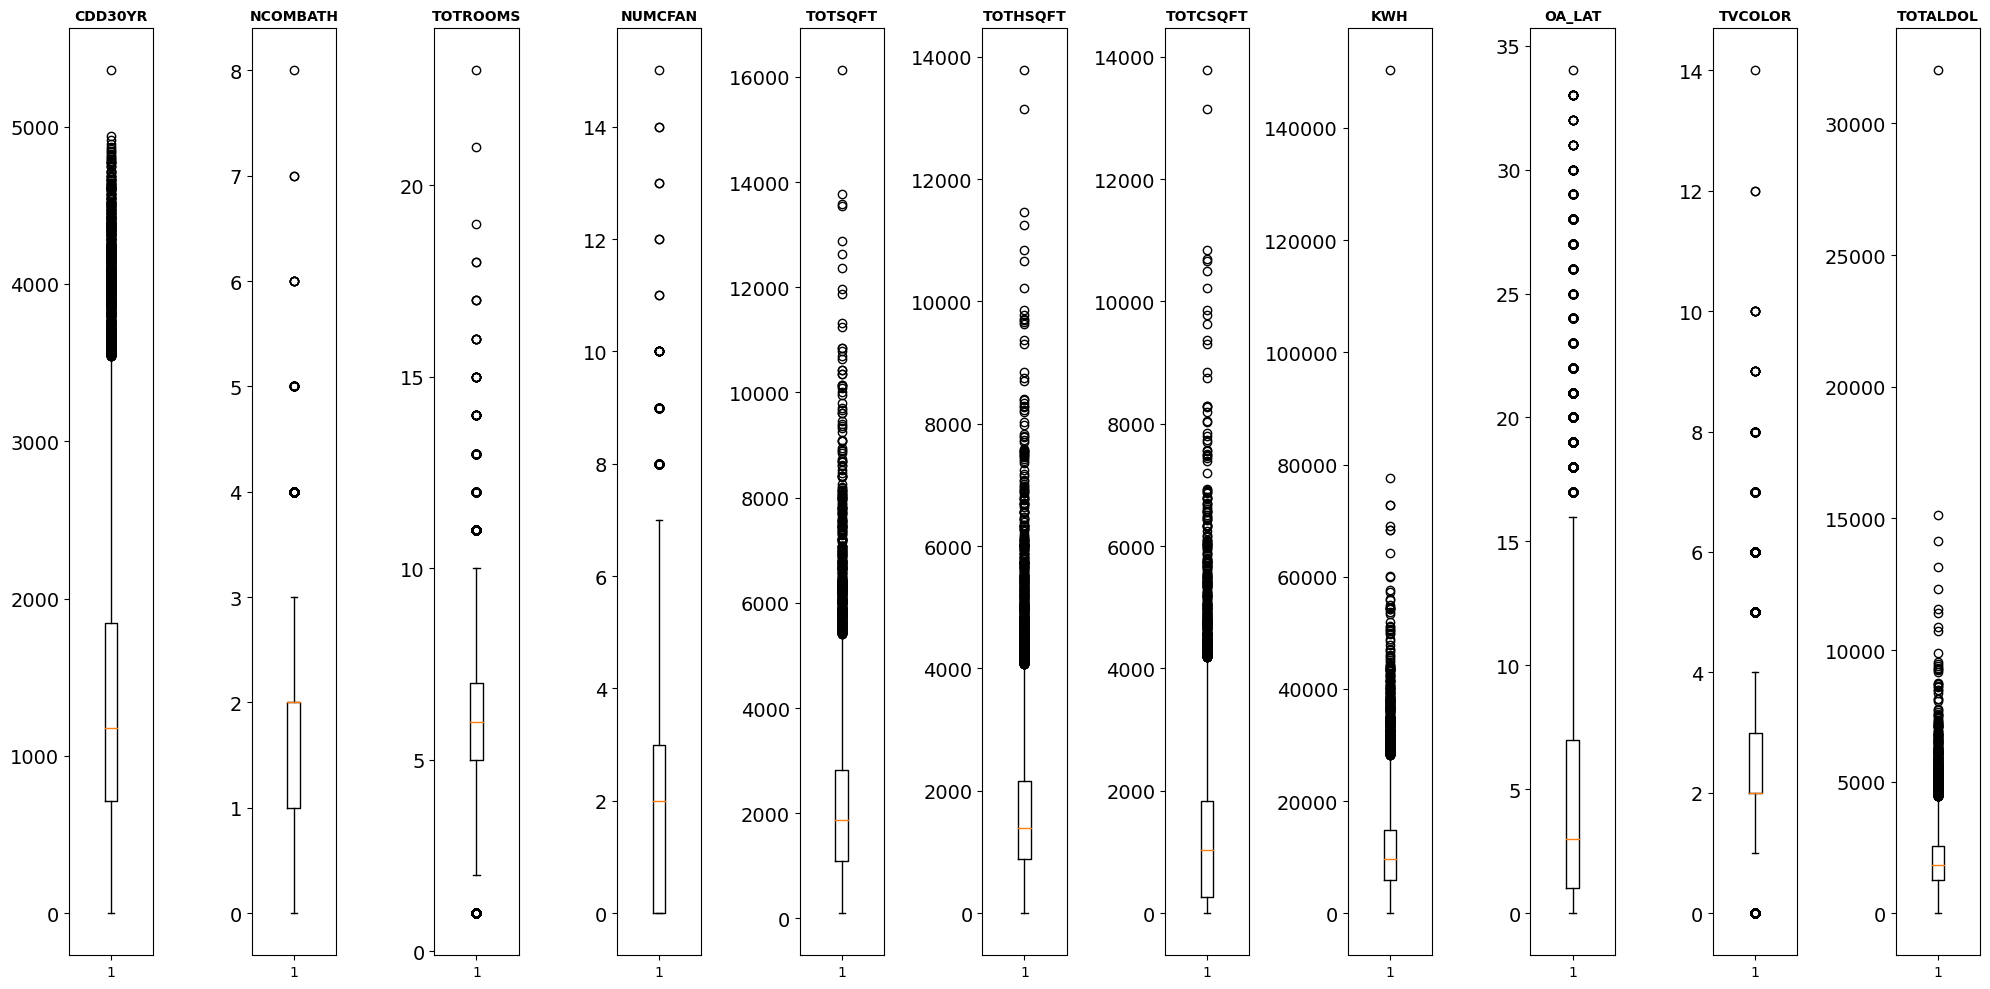

In [26]:
ShowPlots(data=data,columns=outliered_cols, type='box')

#### Should not take out or replace all outlier values as there are a lot of them and they could be a key indicator of electricity consumption.
#### There are around 50 data points above the following thresholds. Outliers are replaced by a random number that represents the outliers only for numerical columns.

In [27]:
## find thresholds
# len(data['TOTALDOL'][data['TOTALDOL']>7000])

In [28]:
threshold = {
    'CDD30YR': 4600,
    'NCOMBATH': 4,
    'TOTROOMS': 13,
    'TOTSQFT': 8500,
    'NUMCFAN': 8,
    'TOTHSQFT': 7000,
    'TOTCSQFT': 6500,
    'KWH': 43000,
    'OA_LAT': 29,
    'TVCOLOR': 7,
    'TOTALBTU': (0.3*pow(10,6)),
    'TOTALDOL': 7000,
}
# Outliers are replaced by a random number that represents the outliers
for col in outliered_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Max = Q3 + 1.5*IQR
    max_threshold = threshold[col]
    if max_threshold - Max < 5:
        Max = Q3
    new_value = random.randint(round(Max)-1, max_threshold+1)    # representative of the outliers
    data.loc[data[col]>max_threshold,col] = new_value

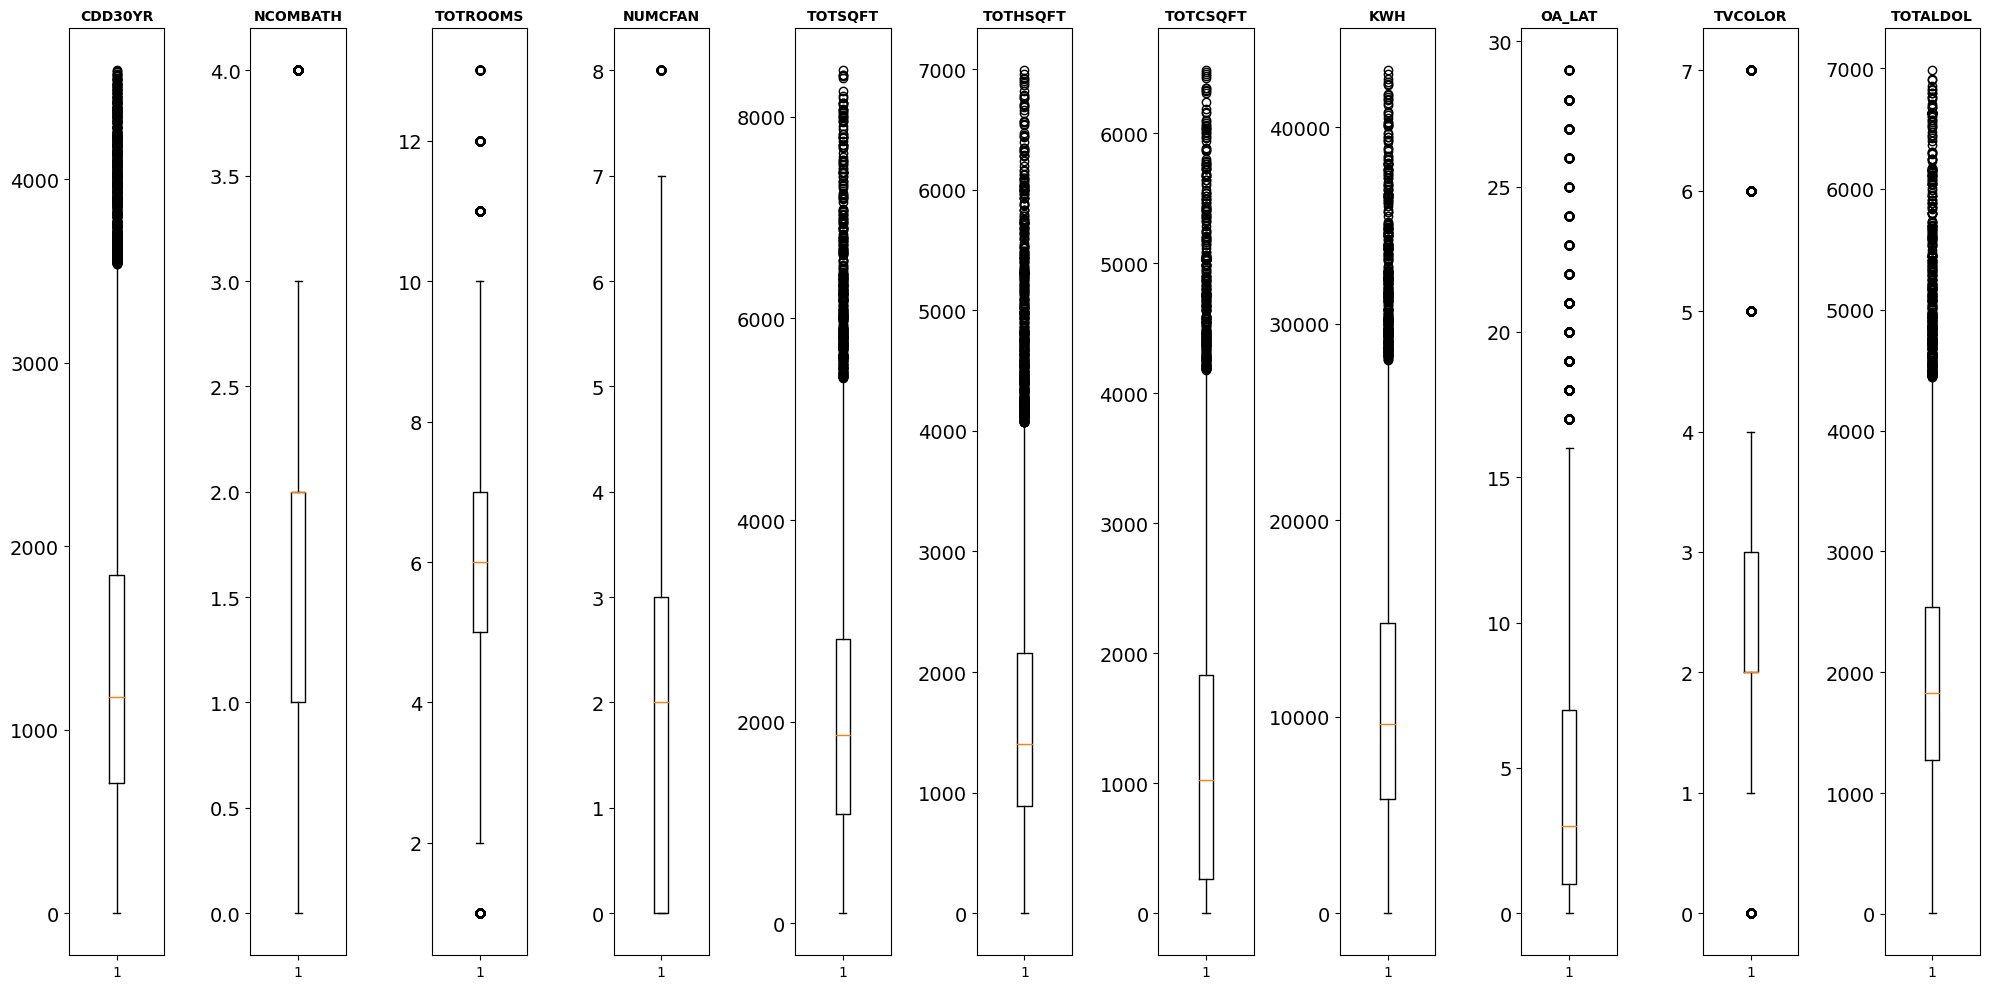

In [29]:
ShowPlots(data=data, columns=outliered_cols, type='box')

In [30]:
data.to_csv('./CSVs/FeaturesSelectedOutliersFixed.csv', index=False)

# OHE, LabelEncoder, MinMaxScaler

In [31]:
# OHE -> pure_categorical
data_OHE = pd.get_dummies(data, columns=pure_categorical)
data_OHE.to_csv('./CSVs/data_OHE.csv', index=False)

## from going through the data it is acceptable that -2 (N/A) value is ordinally lower than other categories
# LabelEncoder -> numerical_with_NA
data_OHE_LE = data_OHE.copy()
le = LabelEncoder()
for col in numerical_with_NA + ordinal_categorical:
    data_OHE_LE[col] = le.fit_transform(data[col])    

# MinMaxScaler -> all columns except KWH
x = data_OHE_LE.loc[:, data_OHE_LE.columns != 'KWH']
y = data_OHE_LE['KWH']
min_max_scaler = MinMaxScaler()
data_OHE_LE_MMS = pd.DataFrame(min_max_scaler.fit_transform(x), columns=x.columns)
data_OHE_LE_MMS['KWH'] = y
data_OHE_LE_MMS.to_csv('./CSVs/data_OHE_LE_MMS.csv', index=False)

# data: Feature Selected, Outlier Fixed -> data;
# data -> OHEd pure_categorical -> data_OHE;
# data_OHE -> LEd numerical_with_NA -> data_OHE_LE;
# data_OHE_LE -> MinMaxScaled all cols -> data_OHE_LE_MMS;

# data_OHE_LE_MMS -> Skewness fix of pure_numerical + numerical_with_NA + ordinal_categorical -> data_OHE_LE_MMS_Sk;

# data_OHE_LE_MMS -> Skewness fix of pure_numerical -> data_OHE_LE_MMS_SkNum;

##################################################################################

## from going through the data it is acceptable that -2 (N/A) value is ordinally lower than other categories
# LabelEncoder -> all categorical columns: pure_categorical + numerical_with_NA + ordinal_categorical
data_LE = data.copy()
le = LabelEncoder()
for col in pure_categorical + numerical_with_NA + ordinal_categorical:
    data_LE[col] = le.fit_transform(data[col])
    
# MinMaxScaler -> all columns except KWH
x = data_LE.loc[:, data_LE.columns != 'KWH']
y = data_LE['KWH']
min_max_scaler = MinMaxScaler()
data_LE_MMS = pd.DataFrame(min_max_scaler.fit_transform(x), columns=x.columns)
data_LE_MMS['KWH'] = y
data_LE_MMS.to_csv('./CSVs/data_LE_MMS.csv', index=False)

# data: Feature Selected, Outlier Fixed -> data;
# data -> LEd pure_categorical + numerical_with_NA + ordinal_categorical -> data_LE
# data_LE -> MinMaxScaled all cols -> data_LE_MMS

# data_LE_MMS -> Skewness fix of pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical -> data_LE_MMS_Sk

# data_LE_MMS -> Skewness fix of pure_numerical -> data_LE_MMS_SkNum;

##################################################################################




#### Datasets created:
A.  <br>
data: Feature Selected, Outlier Fixed -> data; <br>
data -> One-Hot Encoded pure_categorical -> data_OHE; <br>
data_OHE -> Label Encoded numerical_with_NA -> data_OHE_LE; <br>
data_OHE_LE -> MinMaxScaled all cols -> data_OHE_LE_MMS; <br>

B.  <br>
data: Feature Selected, Outlier Fixed -> data; <br>
data -> LEd pure_categorical + numerical_with_NA + ordinal_categorical -> data_LE <br>
data_LE -> MinMaxScaled all cols -> data_LE_MMS <br>



#### More datasets to create by fixing Skewness 
A.Sk <br>
data_OHE_LE_MMS -> Skewness fix of pure_numerical + numerical_with_NA + ordinal_categorical -> data_OHE_LE_MMS_Sk; <br>
data_OHE_LE_MMS -> Skewness fix of pure_numerical -> data_OHE_LE_MMS_SkNum; <br>

B.Sk  <br>
data_LE_MMS -> Skewness fix of pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical -> data_LE_MMS_Sk <br>
data_LE_MMS -> Skewness fix of pure_numerical -> data_LE_MMS_SkNum; <br>

# Skewness Analysis and Fix

In [32]:
data.skew()[(data.skew()>0.4) | (data.skew()<-0.4)]

TYPEHUQ      1.083583
CDD30YR      1.071311
NUMFLRS      5.353859
STUDIO       1.337190
BEDROOMS    -0.698205
NCOMBATH     0.834221
OTHROOMS     1.232131
PRKGPLC1    -0.781532
OUTGRILL    -0.453737
ICE          0.457463
SIZFREEZ     1.096374
TOPFRONT    -1.398627
WASHLOAD    -1.073136
RNSETEMP    -1.594092
DRYER       -1.537943
DRYRFUEL    -0.876188
TVCOLOR      0.796253
TVONWE3      0.573796
WELLPUMP    -0.811954
FUELHEAT     1.056004
WHEATOTH     1.410307
NUMCFAN      0.752214
USECFAN     -0.490602
SWIMPOOL    -0.695427
NOUTLGTNT    1.978762
ELWATER      0.415417
NHSLDMEM     1.241919
HUPROJ       0.875709
TOTSQFT      1.260734
TOTHSQFT     1.341073
TOTCSQFT     1.258803
KWH          1.191880
TOTALDOL     1.271144
OA_LAT       1.737769
dtype: float64

### Skewness fix of:
data=data_OHE_LE_MMS <br>
columns=pure_numerical + numerical_with_NA + ordinal_categorical <br>
data_OHE_LE_MMS -> Skewness fix of pure_numerical + numerical_with_NA + ordinal_categorical -> data_OHE_LE_MMS_Sk; <br>


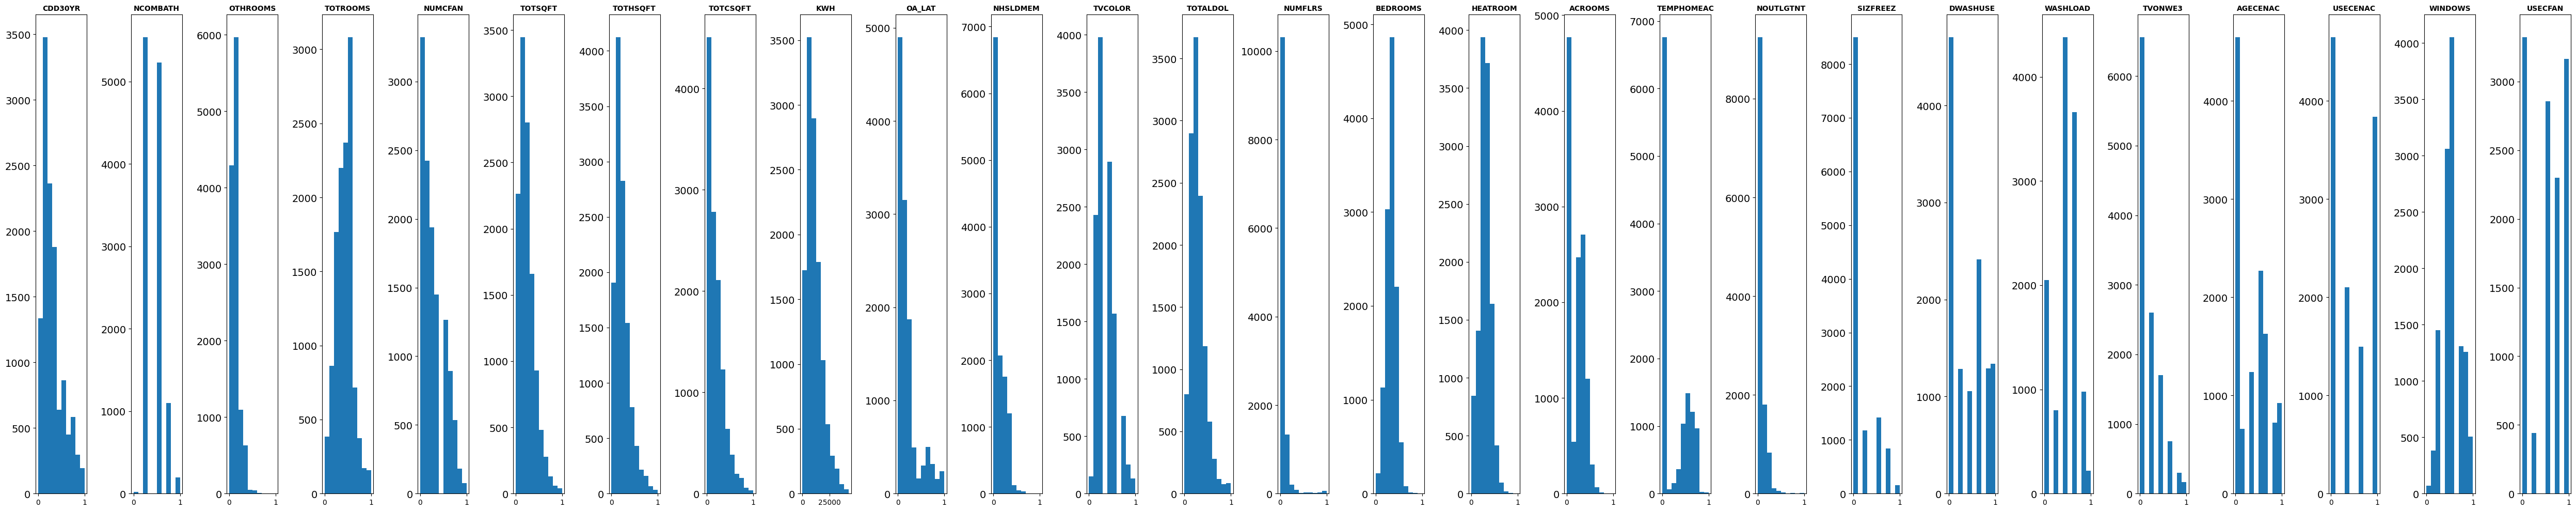

In [33]:
ShowPlots(data=data_OHE_LE_MMS, columns=pure_numerical + numerical_with_NA + ordinal_categorical, type='hist', figsize=(50,10))

In [34]:
# returns a dataframe that tells the best transform method (sqrt or sq or original) to fix skewness based on positive or negative skew
def SkewnessAnalysis(data, columns):
    skew_list = []
    for col in columns:
        original_skew = data[col].skew()
        log_skew = np.log(data[col]).skew()
        sqrt_skew = np.sqrt(data[col]).skew()
        sq_skew = pow(data[col],2).skew()
        
        if abs(original_skew) > 0.4:
            final_skew = 'original'
            final_value = original_skew
            
            if original_skew < 0: # sq
                if abs(sq_skew) < abs(original_skew):
                    final_skew = 'sq'
                    final_value = sq_skew
            else: # original_skew > 0: sqrt
                if abs(sqrt_skew) < abs(original_skew):
                    final_skew = 'sqrt'
                    final_value = sqrt_skew
                    
            skew_list.append([col, original_skew, sqrt_skew, sq_skew, final_skew, final_value,  log_skew])
    best_skewness_df = pd.DataFrame(columns=['variables', 'original_skew', 'sqrt_skew', 'sq_skew', 'final_skew', 'final_value', 'log_skew'], data=skew_list)
    print(best_skewness_df)        
    return best_skewness_df

# apply sqrt or sq transform if positive or negative skew
def SkewnessFix(data, columns):
    data_Sk = data.copy()
    best_skewness_df = SkewnessAnalysis(data, columns)
    skewed_columns_to_fix = list(best_skewness_df['variables'])
    for col in skewed_columns_to_fix:
        final_skew = best_skewness_df['final_skew'][best_skewness_df['variables'] == col]
        best_skew = list(final_skew)[0]

        if best_skew == 'sqrt':
            data_Sk[col] = np.sqrt(data[col])
        elif best_skew == 'sq':
            data_Sk[col] = pow(data[col],2)
        
    return data_Sk


In [35]:
data_OHE_LE_MMS_Sk = SkewnessFix(data=data_OHE_LE_MMS, columns=pure_numerical + numerical_with_NA + ordinal_categorical)

     variables  original_skew  sqrt_skew    sq_skew final_skew  final_value  \
0      CDD30YR       1.071311   0.338471   2.019234       sqrt     0.338471   
1     NCOMBATH       0.834221   0.307831   1.919960       sqrt     0.307831   
2     OTHROOMS       1.232131  -0.459430   5.574299       sqrt    -0.459430   
3      NUMCFAN       0.752214  -0.186488   2.000058       sqrt    -0.186488   
4      TOTSQFT       1.260734   0.479549   2.979181       sqrt     0.479549   
5     TOTHSQFT       1.341073  -0.080754   3.190087       sqrt    -0.080754   
6     TOTCSQFT       1.258803  -0.079232   3.334635       sqrt    -0.079232   
7          KWH       1.191880   0.408735   2.753952       sqrt     0.408735   
8       OA_LAT       1.737769   0.465432   2.852090       sqrt     0.465432   
9     NHSLDMEM       1.241919  -0.223494   5.420037       sqrt    -0.223494   
10     TVCOLOR       0.796253  -0.211103   2.081078       sqrt    -0.211103   
11    TOTALDOL       1.271144   0.401509   3.100130 

In [36]:
data_OHE_LE_MMS_Sk_Sk = SkewnessFix(data=data_OHE_LE_MMS_Sk, columns=pure_numerical + numerical_with_NA + ordinal_categorical)

  variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0  OTHROOMS      -0.459430  -2.277524  1.232131   original    -0.459430   
1   TOTSQFT       0.479549   0.042995  1.260734       sqrt     0.042995   
2       KWH       0.408735  -0.028081  1.191880       sqrt    -0.028081   
3    OA_LAT       0.465432  -0.721721  1.737769   original     0.465432   
4  TOTALDOL       0.401509  -0.074929  1.271144       sqrt    -0.074929   
5   NUMFLRS       2.691927   2.022554  5.688857       sqrt     2.022554   
6  SIZFREEZ       1.099230   0.946623  1.558669       sqrt     0.946623   
7   TVONWE3       0.546412   0.265940  1.427252       sqrt     0.265940   

   log_skew  
0       NaN  
1       NaN  
2 -0.615707  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  


In [37]:
data_OHE_LE_MMS_Sk_Sk_Sk = SkewnessFix(data=data_OHE_LE_MMS_Sk_Sk, columns=pure_numerical + numerical_with_NA + ordinal_categorical)

  variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0  OTHROOMS      -0.459430  -2.277524  1.232131   original    -0.459430   
1    OA_LAT       0.465432  -0.721721  1.737769   original     0.465432   
2   NUMFLRS       2.022554   1.897910  2.691927       sqrt     1.897910   
3  SIZFREEZ       0.946623   0.904123  1.099230       sqrt     0.904123   

   log_skew  
0       NaN  
1       NaN  
2       NaN  
3       NaN  


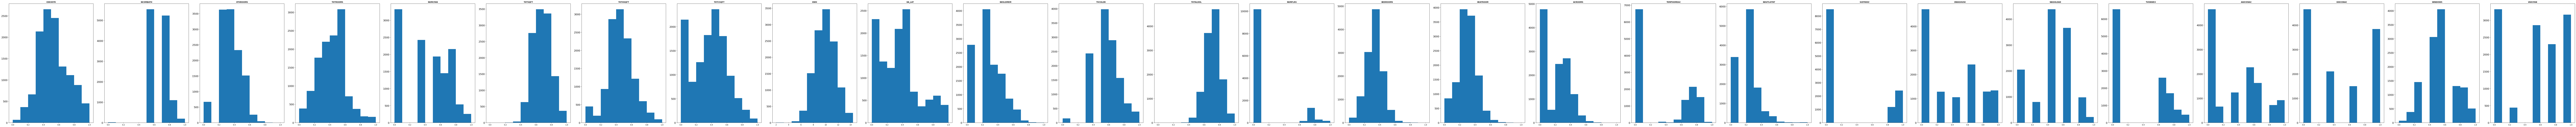

In [38]:
ShowPlots(data=data_OHE_LE_MMS_Sk_Sk_Sk, columns=pure_numerical + numerical_with_NA + ordinal_categorical, type='hist', figsize=(200,10))

### Skewness fix of:
data=data_LE_MMS <br>
columns=pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical <br>
data_LE_MMS -> Skewness fix of pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical -> data_LE_MMS_Sk <br>


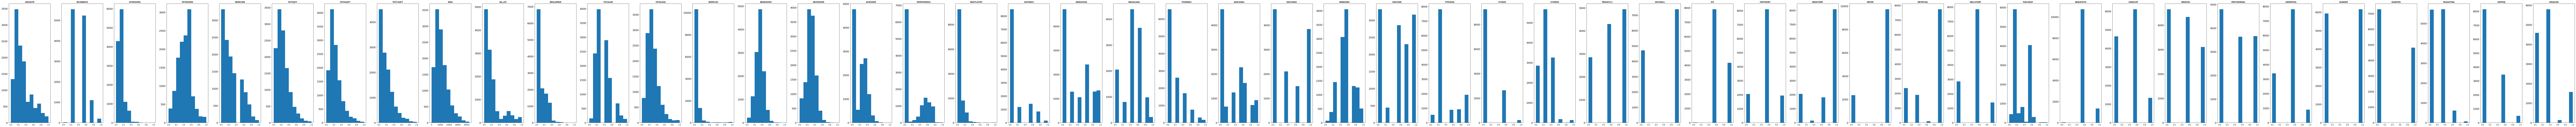

In [39]:
ShowPlots(data=data_LE_MMS, columns=pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical, type='hist', figsize=(200,10))

In [40]:
data_LE_MMS_Sk = SkewnessFix(data=data_LE_MMS, columns=pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical)

     variables  original_skew  sqrt_skew    sq_skew final_skew  final_value  \
0      CDD30YR       1.071311   0.338471   2.019234       sqrt     0.338471   
1     NCOMBATH       0.834221   0.307831   1.919960       sqrt     0.307831   
2     OTHROOMS       1.232131  -0.459430   5.574299       sqrt    -0.459430   
3      NUMCFAN       0.752214  -0.186488   2.000058       sqrt    -0.186488   
4      TOTSQFT       1.260734   0.479549   2.979181       sqrt     0.479549   
5     TOTHSQFT       1.341073  -0.080754   3.190087       sqrt    -0.080754   
6     TOTCSQFT       1.258803  -0.079232   3.334635       sqrt    -0.079232   
7          KWH       1.191880   0.408735   2.753952       sqrt     0.408735   
8       OA_LAT       1.737769   0.465432   2.852090       sqrt     0.465432   
9     NHSLDMEM       1.241919  -0.223494   5.420037       sqrt    -0.223494   
10     TVCOLOR       0.796253  -0.211103   2.081078       sqrt    -0.211103   
11    TOTALDOL       1.271144   0.401509   3.100130 

In [41]:
data_LE_MMS_Sk_Sk = SkewnessFix(data=data_LE_MMS_Sk, columns=pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical)

   variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0   OTHROOMS      -0.459430  -2.277524  1.232131   original    -0.459430   
1    TOTSQFT       0.479549   0.042995  1.260734       sqrt     0.042995   
2        KWH       0.408735  -0.028081  1.191880       sqrt    -0.028081   
3     OA_LAT       0.465432  -0.721721  1.737769   original     0.465432   
4   TOTALDOL       0.401509  -0.074929  1.271144       sqrt    -0.074929   
5    NUMFLRS       2.691927   2.022554  5.688857       sqrt     2.022554   
6   SIZFREEZ       1.099230   0.946623  1.558669       sqrt     0.946623   
7    TVONWE3       0.546412   0.265940  1.427252       sqrt     0.265940   
8     STUDIO       1.307415   1.257362  1.622373       sqrt     1.257362   
9    STORIES      -0.618974  -1.092016  0.994515   original    -0.618974   
10  OUTGRILL      -0.453737  -0.453737 -0.453737   original    -0.453737   
11  RNSETEMP      -1.008425  -1.365073 -0.767863         sq    -0.767863   
12     DRYER

In [42]:
data_LE_MMS_Sk_Sk_Sk = SkewnessFix(data=data_LE_MMS_Sk_Sk, columns=pure_numerical + numerical_with_NA + ordinal_categorical)

  variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0  OTHROOMS      -0.459430  -2.277524  1.232131   original    -0.459430   
1    OA_LAT       0.465432  -0.721721  1.737769   original     0.465432   
2   NUMFLRS       2.022554   1.897910  2.691927       sqrt     1.897910   
3  SIZFREEZ       0.946623   0.904123  1.099230       sqrt     0.904123   

   log_skew  
0       NaN  
1       NaN  
2       NaN  
3       NaN  


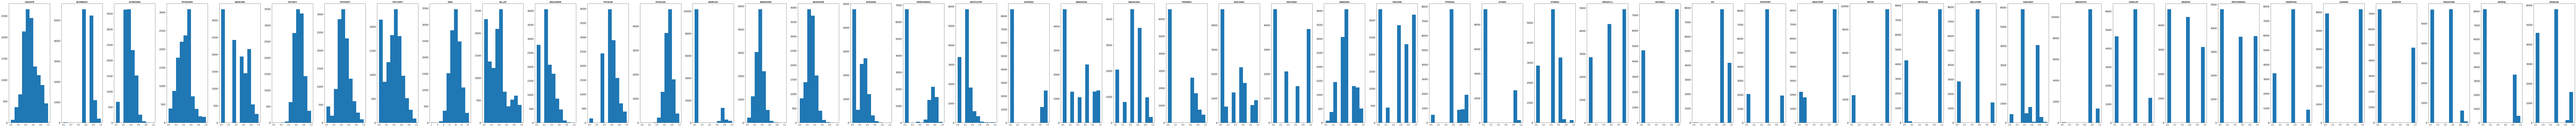

In [43]:
ShowPlots(data=data_LE_MMS_Sk_Sk_Sk, columns=pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical, type='hist', figsize=(200,10))

### Skewness fix of:
data=data_OHE_LE_MMS <br>
columns=pure_numerical <br>
data_OHE_LE_MMS -> Skewness fix of pure_numerical -> data_OHE_LE_MMS_SkNum;

In [44]:
data_OHE_LE_MMS_SkNum = SkewnessFix(data=data_OHE_LE_MMS, columns=pure_numerical)

   variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0    CDD30YR       1.071311   0.338471  2.019234       sqrt     0.338471   
1   NCOMBATH       0.834221   0.307831  1.919960       sqrt     0.307831   
2   OTHROOMS       1.232131  -0.459430  5.574299       sqrt    -0.459430   
3    NUMCFAN       0.752214  -0.186488  2.000058       sqrt    -0.186488   
4    TOTSQFT       1.260734   0.479549  2.979181       sqrt     0.479549   
5   TOTHSQFT       1.341073  -0.080754  3.190087       sqrt    -0.080754   
6   TOTCSQFT       1.258803  -0.079232  3.334635       sqrt    -0.079232   
7        KWH       1.191880   0.408735  2.753952       sqrt     0.408735   
8     OA_LAT       1.737769   0.465432  2.852090       sqrt     0.465432   
9   NHSLDMEM       1.241919  -0.223494  5.420037       sqrt    -0.223494   
10   TVCOLOR       0.796253  -0.211103  2.081078       sqrt    -0.211103   
11  TOTALDOL       1.271144   0.401509  3.100130       sqrt     0.401509   

    log_ske

In [45]:
data_OHE_LE_MMS_SkNum_SkNum = SkewnessFix(data=data_OHE_LE_MMS_SkNum, columns=pure_numerical)

  variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0  OTHROOMS      -0.459430  -2.277524  1.232131   original    -0.459430   
1   TOTSQFT       0.479549   0.042995  1.260734       sqrt     0.042995   
2       KWH       0.408735  -0.028081  1.191880       sqrt    -0.028081   
3    OA_LAT       0.465432  -0.721721  1.737769   original     0.465432   
4  TOTALDOL       0.401509  -0.074929  1.271144       sqrt    -0.074929   

   log_skew  
0       NaN  
1       NaN  
2 -0.615707  
3       NaN  
4       NaN  


In [46]:
data_OHE_LE_MMS_SkNum_SkNum_SkNum = SkewnessFix(data=data_OHE_LE_MMS_SkNum_SkNum, columns=pure_numerical)

  variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0  OTHROOMS      -0.459430  -2.277524  1.232131   original    -0.459430   
1    OA_LAT       0.465432  -0.721721  1.737769   original     0.465432   

   log_skew  
0       NaN  
1       NaN  


### Skewness fix of:
data=data_OHE_LE_MMS <br>
columns=pure_numerical <br>
data_LE_MMS -> Skewness fix of pure_numerical -> data_LE_MMS_SkNum;

In [47]:
data_LE_MMS_SkNum = SkewnessFix(data=data_LE_MMS, columns=pure_numerical)

   variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0    CDD30YR       1.071311   0.338471  2.019234       sqrt     0.338471   
1   NCOMBATH       0.834221   0.307831  1.919960       sqrt     0.307831   
2   OTHROOMS       1.232131  -0.459430  5.574299       sqrt    -0.459430   
3    NUMCFAN       0.752214  -0.186488  2.000058       sqrt    -0.186488   
4    TOTSQFT       1.260734   0.479549  2.979181       sqrt     0.479549   
5   TOTHSQFT       1.341073  -0.080754  3.190087       sqrt    -0.080754   
6   TOTCSQFT       1.258803  -0.079232  3.334635       sqrt    -0.079232   
7        KWH       1.191880   0.408735  2.753952       sqrt     0.408735   
8     OA_LAT       1.737769   0.465432  2.852090       sqrt     0.465432   
9   NHSLDMEM       1.241919  -0.223494  5.420037       sqrt    -0.223494   
10   TVCOLOR       0.796253  -0.211103  2.081078       sqrt    -0.211103   
11  TOTALDOL       1.271144   0.401509  3.100130       sqrt     0.401509   

    log_ske

In [48]:
data_LE_MMS_SkNum_SkNum = SkewnessFix(data=data_LE_MMS_SkNum, columns=pure_numerical)

  variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0  OTHROOMS      -0.459430  -2.277524  1.232131   original    -0.459430   
1   TOTSQFT       0.479549   0.042995  1.260734       sqrt     0.042995   
2       KWH       0.408735  -0.028081  1.191880       sqrt    -0.028081   
3    OA_LAT       0.465432  -0.721721  1.737769   original     0.465432   
4  TOTALDOL       0.401509  -0.074929  1.271144       sqrt    -0.074929   

   log_skew  
0       NaN  
1       NaN  
2 -0.615707  
3       NaN  
4       NaN  


In [49]:
data_LE_MMS_SkNum_SkNum_SkNum = SkewnessFix(data=data_LE_MMS_SkNum_SkNum, columns=pure_numerical)

  variables  original_skew  sqrt_skew   sq_skew final_skew  final_value  \
0  OTHROOMS      -0.459430  -2.277524  1.232131   original    -0.459430   
1    OA_LAT       0.465432  -0.721721  1.737769   original     0.465432   

   log_skew  
0       NaN  
1       NaN  


#### MinMaxScaling required to fix skewness of data_OHE_LE_Sk b/c data has negative value 

In [50]:
# data_OHE_LE_Sk = SkewnessFix(data=data_OHE_LE, columns=pure_numerical + numerical_with_NA + ordinal_categorical)

In [51]:
# data_OHE_LE_Sk_Sk = SkewnessFix(data=data_OHE_LE_Sk, columns=pure_numerical + numerical_with_NA + ordinal_categorical)

# Data sets to experiment with
<li>data

<li>data_OHE 
<li>data_OHE_LE
<li>data_OHE_LE_MMS <-- MMS not applied to KWH

<li>data_OHE_LE_MMS_Sk <-- sqrt applied to KWH 1st time
<li>data_OHE_LE_MMS_Sk_Sk <-- sqrt applied to KWH and appropriate columns 2nd time
<li>data_OHE_LE_MMS_Sk_Sk_Sk <-- sqrt applied to KWH and appropriate columns 3rd time
<li>data_OHE_LE_MMS_SkNum
<li>data_OHE_LE_MMS_SkNum_SkNum
<li>data_OHE_LE_MMS_SkNum_SkNum_SkNum

                           
<li>data_LE
<li>data_LE_MMS <-- MMS not applied to KWH

<li>data_LE_MMS_Sk <-- sqrt applied to KWH 1st time
<li>data_LE_MMS_Sk_Sk <-- sqrt applied to KWH and appropriate columns 2nd time
<li>data_LE_MMS_Sk_Sk_Sk <-- sqrt applied to KWH and appropriate columns 3rd time
<li>data_LE_MMS_SkNum
<li>data_LE_MMS_SkNum_SkNum
<li>data_LE_MMS_SkNum_SkNum_SkNum



# Datasets created:
A.  <br>
data: Feature Selected, Outlier Fixed -> data; <br>
data -> One-Hot Encoded pure_categorical -> data_OHE; <br>
data_OHE -> Label Encoded numerical_with_NA -> data_OHE_LE; <br>
data_OHE_LE -> MinMaxScaled all cols -> data_OHE_LE_MMS; <br>

B.  <br>
data: Feature Selected, Outlier Fixed -> data; <br>
data -> LEd pure_categorical + numerical_with_NA + ordinal_categorical -> data_LE <br>
data_LE -> MinMaxScaled all cols -> data_LE_MMS <br>



#### More datasets to create by fixing Skewness 
A.Sk <br>
data_OHE_LE_MMS -> Skewness fix of pure_numerical + numerical_with_NA + ordinal_categorical -> data_OHE_LE_MMS_Sk; <br>
data_OHE_LE_MMS -> Skewness fix of pure_numerical -> data_OHE_LE_MMS_SkNum; <br>

B.Sk  <br>
data_LE_MMS -> Skewness fix of pure_numerical + numerical_with_NA + ordinal_categorical + pure_categorical -> data_LE_MMS_Sk <br>
data_LE_MMS -> Skewness fix of pure_numerical -> data_LE_MMS_SkNum; <br>

In [52]:
data_LE_MMS_Sk.to_csv('./CSVs/data_LE_MMS_Sk.csv', index=False)

In [53]:
data_OHE_LE_MMS_Sk_Sk_Sk.to_csv('./CSVs/data_OHE_LE_MMS_Sk_Sk_Sk.csv', index=False)

# Grid Search Parameter Tuning

In [54]:
scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_median_absolute_error',
}

cv = 5

# Grid search hyperparameter tuning
def RandomForestRegressor_tuning(df):
    
    X = df.loc[:, df.columns != 'KWH']
    y = df['KWH']

    param_grid = {
        'n_estimators': [100,],  # range(5, 110, 5),
        'max_depth': [50,] # range(5, 110, 5)
    }
    gs = GridSearchCV(RandomForestRegressor(),
                      param_grid=param_grid,
                      refit='RMSE', return_train_score=True, cv=cv)
    gs.fit(X, y)

    results = gs.cv_results_
    result_df = pd.DataFrame(results)
    result_df.to_csv("./results/results_rf.csv")
    
    pkl_filename = "./models/RandomForestRegressor.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gs, file)

    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
    print("\n The best score across ALL searched params:\n",gs.best_score_)
    print("\n The best parameters across ALL searched params:\n",gs.best_params_)
    
def AdaBoostRegressor_tuning(df):
    
    X = df.loc[:, df.columns != 'KWH']
    y = df['KWH']

    param_grid = {
        "base_estimator__criterion" : ["friedman_mse"],
        "base_estimator__max_depth": [12], #[150,], # range(5, 110, 5),
        "n_estimators": [5], #[500,], # range(5, 110, 5)
    }

    DTR = DecisionTreeRegressor()
    ABR = AdaBoostRegressor(base_estimator = DTR)

    gs = GridSearchCV(ABR,
                      param_grid=param_grid,
                      scoring=scoring, refit='RMSE', return_train_score=True, cv=cv)
    gs.fit(X, y)
    
    results = gs.cv_results_
    result_df = pd.DataFrame(results)
    result_df.to_csv("./results/results_ada.csv")

    pkl_filename = "./models/AdaBoostRegressor.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gs, file)

    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
    print("\n The best score across ALL searched params:\n",gs.best_score_)
    print("\n The best parameters across ALL searched params:\n",gs.best_params_)

def GradientBoostingRegressor_tuning(df):
    
    X = df.loc[:, df.columns != 'KWH']
    y = df['KWH']

    param_grid = {
        "n_estimators": [5,], # range(5, 110, 5)
        "max_depth": [12,], # range(5, 110, 5),
        "learning_rate": [0.01,],
    }

    gs = GridSearchCV(GradientBoostingRegressor(),
                      param_grid=param_grid,
                      scoring=scoring, refit='RMSE', return_train_score=True, cv=cv)
    gs.fit(X, y)
    
    results = gs.cv_results_
    result_df = pd.DataFrame(results)
    result_df.to_csv("./results/results_gbr.csv")

    pkl_filename = "./models/GradientBoostingRegressor.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gs, file)

    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
    print("\n The best score across ALL searched params:\n",gs.best_score_)
    print("\n The best parameters across ALL searched params:\n",gs.best_params_)   
    
    
def SVR_tuning(df):
    
    X = df.loc[:, df.columns != 'KWH']
    y = df['KWH']

    param_grid = {
        'degree': [3,], # range(3, 31, 1),
        'C': [5], # range(1,101,1)
    }

    gs = GridSearchCV(SVR(kernel="poly", gamma="auto", epsilon=0.1, coef0=1),
                      param_grid=param_grid,
                      scoring=scoring, refit='RMSE', return_train_score=True, cv=cv)
    gs.fit(X, y)
    
    results = gs.cv_results_
    result_df = pd.DataFrame(results)
    result_df.to_csv("./results/results_svr.csv")

    pkl_filename = "./models/SVR.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gs, file)

    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
    print("\n The best score across ALL searched params:\n",gs.best_score_)
    print("\n The best parameters across ALL searched params:\n",gs.best_params_)    
    
    
def KNeighborsRegressor_tuning(df):
    
    X = df.loc[:, df.columns != 'KWH']
    y = df['KWH']

    param_grid = {
        'n_neighbors': [5,], # range(2, 15, 1),
        'weights': ['distance', ], # 'uniform'
        'p': [1,] # 2
    }

    gs = GridSearchCV(KNeighborsRegressor(),
                      param_grid=param_grid,
                      scoring=scoring, refit='RMSE', return_train_score=True, cv=cv)
    gs.fit(X, y)
    
    results = gs.cv_results_
    result_df = pd.DataFrame(results)
    result_df.to_csv("./results/results_knn.csv")

    pkl_filename = "./models/KNeighborsRegressor.pkl"
    with open(pkl_filename, 'wb') as file:
        pickle.dump(gs, file)

    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
    print("\n The best score across ALL searched params:\n",gs.best_score_)
    print("\n The best parameters across ALL searched params:\n",gs.best_params_)    

In [55]:
# df = data
# df = data_OHE
# df = data_OHE_LE
# df = data_OHE_LE_MMS
# df = data_OHE_LE_MMS_Sk
df = data_OHE_LE_MMS_Sk_Sk # best rmse with linear regression
# df = data_OHE_LE_MMS_Sk_Sk_Sk

# df = data
# df = data_LE
# df = data_LE_MMS
# df = data_LE_MMS_Sk
# df = data_LE_MMS_Sk_Sk
# df = data_LE_MMS_Sk_Sk_Sk

print(df.shape)

X = df.loc[:, df.columns != 'KWH']
y = df['KWH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

# RandomForestRegressor_tuning(training_data)

# AdaBoostRegressor_tuning(training_data)

# GradientBoostingRegressor_tuning(training_data)

# PolynomialRegressor_tuning(training_data)

# SVR_tuning(training_data)

# KNeighborsRegressor_tuning(training_data)

(12083, 105)


In [56]:
def AnalyzeGridSearchResult(input_file, results_file, best_hp_file):

    results_df = pd.read_csv(input_file)
    results_cols = ["params", "mean_test_RMSE", "mean_test_MAE", "mean_train_RMSE", "mean_train_MAE"]
    
    results_df = results_df[results_cols]
    results_df.to_csv(results_file)

    # final_df = pd.DataFrame(columns = ["params", "train_accuracy", "test_accuracy", "train_recall_overall", "test_recall_overall", "train_precison", "test_precison" ])
    final_df = pd.DataFrame(columns = results_cols)
    check_cols = results_cols
    for attr in check_cols:
        sorted = (results_df.sort_values(by=[attr], ascending=False)).head(3)
        # print(sorted)
        final_df= final_df.append(sorted)

    final_df["params"] = final_df.params.apply(lambda x: str(x))
    final_df= final_df.drop_duplicates().sort_values(by=["mean_test_RMSE"], ascending=False)
    final_df.to_csv(best_hp_file)
    
    # plot RMSE vs param1, RMSE vs param2, RMSE vs param3, RMSE vs paramN.
    
    return final_df


# results_rf_short = AnalyzeGridSearchResult("./results/results_rf.csv", "./results/results_rf_short.csv", "./results/best_hp_rf.csv")
# results_ada_short = AnalyzeGridSearchResult("./results/results_ada.csv", "./results/results_ada_short.csv", "./results/best_hp_ada.csv")
# results_xgb_short = AnalyzeGridSearchResult("./results/results_xgb.csv", "./results/results_xgb_short.csv", "./results/best_hp_xgb.csv")

# for each model, plot RMSE vs param1, RMSE vs param2, RMSE vs param3, RMSE vs paramN.
# Then choose the N params for which RMSE is minimum

# Choose Dataset and Model

In [57]:
### choose best hyperparameters from GridSearchCV results and plots to fit model on test data then look at model score and RMSE 
# df = data
# df = data_OHE
# df = data_OHE_LE
# df = data_OHE_LE_MMS
# df = data_OHE_LE_MMS_Sk
# df = data_OHE_LE_MMS_Sk_Sk # best rmse with linear regression
df = data_OHE_LE_MMS_Sk_Sk_Sk
# df = data_OHE_LE_MMS_SkNum
# df = data_OHE_LE_MMS_SkNum_SkNum
# df = data_OHE_LE_MMS_SkNum_SkNum_SkNum

# df = data
# df = data_LE
# df = data_LE_MMS
# df = data_LE_MMS_Sk
# df = data_LE_MMS_Sk_Sk
# df = data_LE_MMS_Sk_Sk_Sk
# df = data_LE_MMS_SkNum
# df = data_LE_MMS_SkNum_SkNum
# df = data_LE_MMS_SkNum_SkNum_SkNum

print(df.shape)

# Without using TOTALDOL
# X_ = df.loc[:, df.columns != 'KWH']
# X = X_.loc[:, X_.columns != 'TOTALDOL']
# y = df['KWH']

# Using TOTALDOL
X = df.loc[:, df.columns != 'KWH']
y = df['KWH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

## RandomForestRegressor
# model = RandomForestRegressor(n_estimators=500, max_depth=150)

### AdaBoostRegressor
# base = DecisionTreeRegressor(max_depth=150)
# model = AdaBoostRegressor(base_estimator=base, n_estimators=500)

# max_depth=150, n_estimators=200: score=60%, rmse=4497
# max_depth=150, n_estimators=500: score=%, rmse=


### GradientBoostingRegressor
# model = GradientBoostingRegressor(n_estimators=500, max_depth=150, learning_rate=0.50)

### LinearRegression
# model = LinearRegression()

# SVR(C=10, coef0=1, degree=4, gamma='auto', kernel='poly')
# rmse:  0.9824089513758306
# mae:  0.7297041616955794
# r2/score:  0.6312105133773087

# SVR(C=10, coef0=1, degree=3, gamma='auto', kernel='poly')
# rmse:  0.9743300668778033
# mae:  0.7242847049467936
# r2/score:  0.6372510874486772

# best score and model so far
# SVR(C=10, coef0=1, degree=2, gamma='auto', kernel='poly')
# rmse:  0.9742097611867144
# mae:  0.7228226719590094
# r2/score:  0.6373406629751275

### KNeighborsRegressor
# model = KNeighborsRegressor(n_neighbors=100, weights='distance')

#### Ridge
# model = Ridge(random_state=5, alpha= 0.1, tol=0.1, solver='auto' )

# RidgeCV
# model = RidgeCV()

#### HuberRegressor
# model = HuberRegressor()

#### BayesianRidge
# model = BayesianRidge()

### SVR
model = SVR(kernel="poly", gamma="auto", epsilon=0.1, coef0=1, degree=3, C=10)


# fit model
model.fit(X_train,y_train)

# run predictions on testing data
predictions = model.predict(X_test)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MAE = mean_absolute_error(y_test, predictions)
score = model.score(X_test,y_test)
adjusted_r2 = 1-(1-score)*(12083-1)/(12083-49-1)
print(model)
print('rmse: ',RMSE)
print('mae: ',MAE)
print('r2/score: ',score)
print('adjusted_r2: ',adjusted_r2)


(12083, 105)
SVR(C=10, coef0=1, gamma='auto', kernel='poly')
rmse:  0.7480777455639873
mae:  0.5506379872497434
r2/score:  0.7854048338894721
adjusted_r2:  0.7845309734108371


In [58]:
# Sk
# predictions_errors = pd.DataFrame(data={
#                             'y_test':y_test, 
#                            'predictions':predictions,
#                            'prediction_error':abs(y_test-predictions), 
#                            'KWH':pow(y_test,2),
#                            'KWH_Prediction':pow(predictions,2),
#                            'KWH_Error':abs(pow(y_test,2)-pow(predictions,2))
#                       })

# Sk_Sk
predictions_errors = pd.DataFrame(data={
                            'y_test':y_test, 
                           'predictions':predictions,
                           'prediction_error':abs(y_test-predictions), 
                           'KWH':pow(pow(y_test,2),2),
                           'KWH_Prediction':pow(pow(predictions,2),2),
                           'KWH_Error':abs(pow(pow(y_test,2),2)-pow(pow(predictions,2),2))
                      })

# Sk_Sk_Sk <-- no need because KWH never get transformed the 3rd time

predictions_errors

y_test  predictions  prediction_error      KWH  KWH_Prediction  \
12063  11.075846    11.584848          0.509002  15049.0    18011.976297   
5988   10.040256     9.519181          0.521076  10162.0     8211.041598   
10160  11.458673    11.501770          0.043097  17240.0    17500.834104   
5419    7.904555     9.297385          1.392829   3904.0     7472.108875   
134     9.631082    11.141992          1.510910   8604.0    15411.731044   
...          ...          ...               ...      ...             ...   
2617   10.676462    10.122437          0.554025  12993.0    10498.814280   
12046  10.554628    10.614826          0.060198  12410.0    12695.550340   
7940    9.139389     8.918447          0.220942   6977.0     6326.404872   
8273   10.109682     9.902852          0.206830  10446.0     9617.033536   
6455   10.241602    10.079590          0.162013  11002.0    10322.179159   

         KWH_Error  
12063  2962.976297  
5988   1950.958402  
10160   260.834104  
5419   3568.108875  
134    6807.731044  
...            ...  
2617   2494.185720  
12046   285.550340  
7940    650.595128  
8273    828.966464  
6455    679.820841  

[1209 rows x 6 columns]

In [59]:
print('MAE_KWH: ', sum(predictions_errors['KWH_Error'])/1209)


MAE_KWH:  2276.2502303245396
